In [1]:
import numpy as np
from scipy import stats
import arviz as az
from matplotlib import pyplot as plt

1. Suppose the globe tossing data (Chapter 2) had turned out to be 4 water and 11 land. Construct the posterior distribution, using grid approximation. Use the same flat prior as in the book.

In [2]:
# create possible prior values for p
p = np.linspace(start = 0, stop = 1, num = 100)
# likelihood function will be binomial
likelihood = stats.binom.pmf(n = 15, k = 4, p = p)
# uniform prior distribution for p priors
prior = 1
posterior = prior * likelihood
posterior /= np.sum(posterior)

Text(0, 0.5, 'posterior probability')

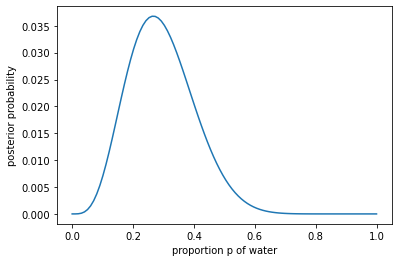

In [3]:
plt.plot(p,posterior);
plt.xlabel('proportion p of water')
plt.ylabel('posterior probability')

In [4]:
samples1 = np.random.choice(p,size = 10000, p = posterior)
np.mean(samples1)

0.29421616161616165

2. Now suppose the data are 4 water and 2 land. Compute the posterior again, but this time use a prior that is zero below p = 0.5 and a constant above p = 0.5. This corresponds to prior information that a majority of the Earth’s surface is water.

Text(0, 0.5, 'posterior probability')

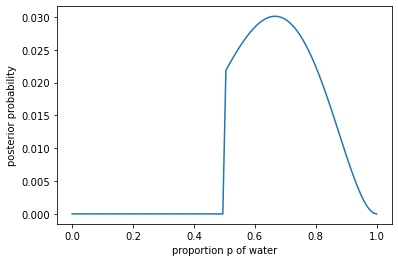

In [5]:
likelihood2 = stats.binom.pmf(n = 6, k = 4, p = p)
prior2 = np.heaviside(p-0.5,0.5)
# plt.plot(prior2)
posterior2 = prior2*likelihood2
posterior2 /= np.sum(posterior2)

plt.plot(p, posterior2);
plt.xlabel('proportion p of water')
plt.ylabel('posterior probability')

3. For the posterior distribution from 2,compute 89% percentile and HPDI intervals. Compare the widths of these intervals. Which is wider? Why? If you had only the information in the interval, what might you misunderstand about the shape of the posterior distribution?

In [6]:
# to test the posterior, we need to sample from it
samples = np.random.choice(p, size = 10000, replace = True, p = posterior2)

# 89% hdpi
hdi = az.hdi(samples, 0.89)

In [7]:
# we assume equal intervals above and below for the 89% mass
perc = np.percentile(samples,[5.5,94.5])

In [8]:
hdi , perc

(array([0.51515152, 0.84848485]), array([0.52525253, 0.87878788]))

In [9]:
hdi[1]-hdi[0], perc[1]-perc[0]

(0.33333333333333326, 0.3535353535353536)

In [10]:
#this is to check against the answers from McElreath
np.mean(samples)

0.6914101010101011

4. OPTIONAL CHALLENGE.Suppose there is bias in sampling so that Land is more likely than Water to be recorded. Specifically, assume that 1-in-5 (20%) of Water samples are accidentally recorded instead as ”Land”. 

- First, write a generative simulation of this sampling process. Assuming the true proportion of Water is 0.70, what proportion does your simulation tend to produce instead? 

- Second, using a simulated sample of 20 tosses, compute the unbiased posterior distribution of the true proportion of water.

In [11]:
# how many W will you see with this biased sample?

# how many W will be reported assuming true p(Water) = 0.7 but 80% reported
W_s = np.random.binomial(n = 20, p = 0.7,size = 10000)*0.8
#round to get integer num successes
W = int(np.mean(W_s))
# now calculate likelihood of this model
likelihood4 = stats.binom.pmf(n = 20, k = W, p = p)
posterior4 = prior * likelihood4
posterior4 /= np.sum(posterior4)

In [12]:
samples4 = np.random.choice(p,size = 10000, p = posterior4)

In [13]:
np.mean(samples4)

0.545720202020202

In [14]:
# same procedure above but using unbiased reporting
trueW_s = np.random.binomial(n = 20, p = 0.7, size = 10000)
trueW = int(np.mean(trueW_s))
likelihood5 = stats.binom.pmf(n = 20, k = trueW, p = p)
posterior5 = prior * likelihood5
posterior5 /= np.sum(posterior5)
samples5 = np.random.choice(p,size = 10000, p = posterior5)

In [15]:
np.mean(samples5)

0.68180101010101

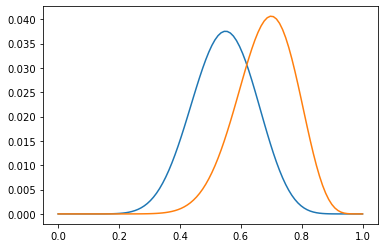

In [16]:
plt.plot(p,posterior4);
plt.plot(p,posterior5);

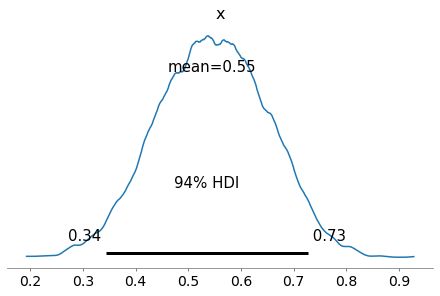

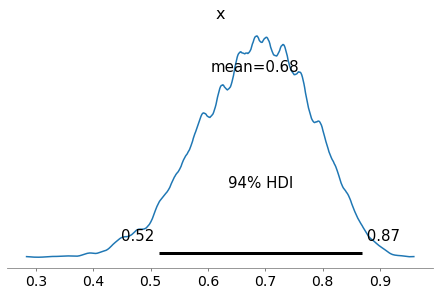

In [17]:
az.plot_posterior(samples4);
az.plot_posterior(samples5);

In [18]:
'''
Alternatively: we have two models:

One with prob(water) = 0.7 , prob (water being reported) = 0.8
Another with prob water = 0.7, prob (water being reported) = 1.0
'''
trueW = np.random.binomial(n = 20, p = 0.7, size = 10000)
obsW = np.random.binomial(n = 20, p = 0.7*0.8, size = 10000)

np.mean(trueW) / 20, np.mean(obsW)/20

(0.700695, 0.560835)